<a href="https://colab.research.google.com/github/candido05/Repositorio-do-livro-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow-/blob/main/Capitulo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 5 - Máquinas de Vetores de Suporte

* Classificação de margem suave

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] #comprimento da pétala, largura da pétala
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

* Classificação SVM não linear

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

poly_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

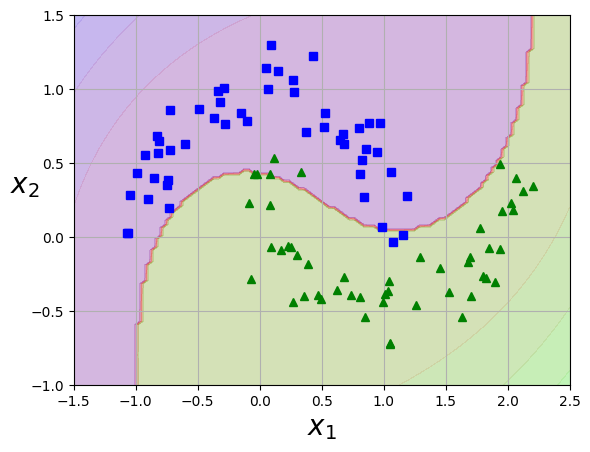

In [5]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

* Kernel polinomial

In [6]:
from sklearn.svm import SVC

poly_kernel_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

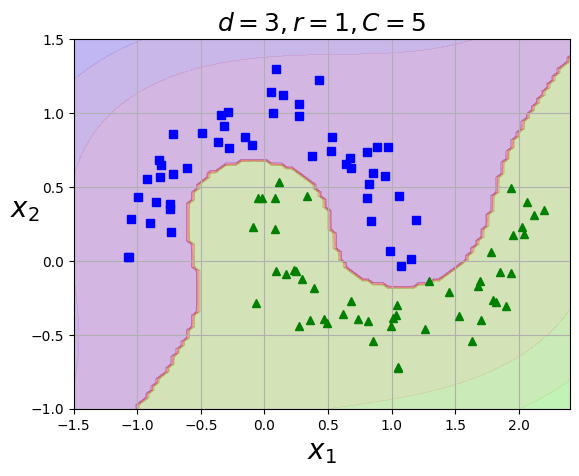

In [7]:
plot_predictions(poly_kernel_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)
plt.show()

* Kernel gaussiano RBF

In [8]:
rbf_kernel_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='rbf', gamma=5, C=1e-3))
])

rbf_kernel_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

### Regressão SVM

In [9]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [10]:
# Regressão polinomial
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

### Exercícios

* Q. 8

In [11]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [12]:
from sklearn.linear_model import SGDClassifier

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", alpha=alpha, random_state=42, eta0=1e-3,
                        learning_rate="constant", max_iter=1000, tol=1e-3)

# dados com separabilidade linear
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

lin_clf.fit(X_scaler, y)
svm_clf.fit(X_scaler, y)
sgd_clf.fit(X_scaler, y)

print("LinearSVC:..................:", lin_clf.intercept_, lin_clf.coef_)
print("SVC:........................:", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:..................: [0.28475098] [[1.05364854 1.09903804]]
SVC:........................: [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


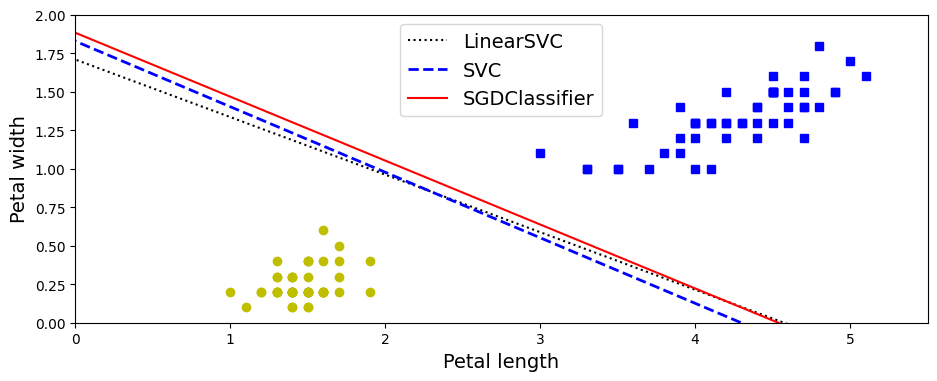

In [13]:
# Calcule a inclinação e o viés de cada limite de decisão
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transforme as linhas de limite de decisão de volta à escala original
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

* Q. 9

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [15]:
# usando um classificador SVM linear, o qual já usa
# automaticamente a estratégia One-vs-All

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

In [17]:
# dimensionando os dados

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaler = scaler.transform(X_test.astype(np.float32))

In [18]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaler, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [19]:
y_pred = lin_clf.predict(X_train_scaler)
accuracy_score(y_train, y_pred)

0.9214

In [21]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaler[:10000], y_train[:10000])

SVC()

In [23]:
y_pred = svm_clf.predict(X_train_scaler)
accuracy_score(y_train, y_pred)

0.9455333333333333

In [24]:
# pesquisa aleatória com cross validation

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaler[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=3.981183962897763, gamma=0.016014555761630085; total time=   0.5s
[CV] END ....C=3.981183962897763, gamma=0.016014555761630085; total time=   0.4s
[CV] END ....C=3.981183962897763, gamma=0.016014555761630085; total time=   0.4s
[CV] END ....C=8.759383262350369, gamma=0.060688358531698426; total time=   0.4s
[CV] END ....C=8.759383262350369, gamma=0.060688358531698426; total time=   0.4s
[CV] END ....C=8.759383262350369, gamma=0.060688358531698426; total time=   0.4s
[CV] END ...C=10.893563554738984, gamma=0.006870664635015208; total time=   0.4s
[CV] END ...C=10.893563554738984, gamma=0.006870664635015208; total time=   0.4s
[CV] END ...C=10.893563554738984, gamma=0.006870664635015208; total time=   0.4s
[CV] END ..C=1.0140205897232937, gamma=0.0037318430318531545; total time=   0.3s
[CV] END ..C=1.0140205897232937, gamma=0.0037318430318531545; total time=   0.4s
[CV] END ..C=1.0140205897232937, gamma=0.0037318

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ac7a64bd780>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ac7a3d10040>},
                   verbose=2)

In [25]:
print(rnd_search_cv.best_estimator_)
print(rnd_search_cv.best_score_)

SVC(C=1.0140205897232937, gamma=0.0037318430318531545)
0.780981580382778


In [26]:
# treinando o estimador com todo o conjunto de treino

rnd_search_cv.best_estimator_.fit(X_train_scaler, y_train)
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaler)
accuracy_score(y_train, y_pred)

0.9964666666666666

In [28]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaler)
accuracy_score(y_test, y_pred)

0.9556